## Household energy consumption analysis

## Setup

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

current_data_df = pd.read_csv("./data/household_data.csv", delimiter=";")
current_data_df["Month_Year"] = current_data_df["Month"].str[:3].str.capitalize() + " " + current_data_df["Year"].astype(str).str[-2:]
current_data_df

,Year,Month,Consumption,Temperature,Invoice,Month_Year
0,2023,august,648,16.85,642.28,Aug 23
1,2023,september,493,15.10,861.06,Sep 23
2,2023,october,988,5.70,885.02,Oct 23
3,2023,november,1400,0.60,1593.23,Nov 23
4,2023,december,1950,-3.50,3033.28,Dec 23
5,2024,january,1931,-4.30,3990.47,Jan 24
6,2024,february,1245,-0.40,4586.01,Feb 24
7,2024,march,1171,2.60,2595.36,Mar 24
8,2024,april,759,4.60,2651.73,Apr 24
9,2024,may,531,14.80,1893.53,May 24


## Current situation analysis

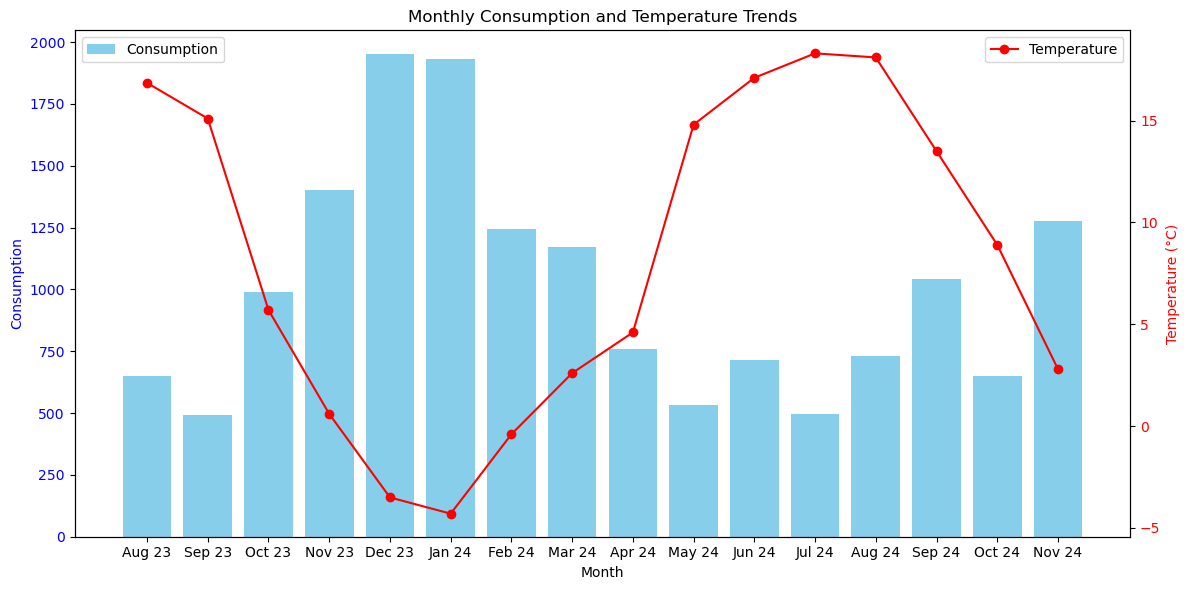

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(current_data_df["Month_Year"], current_data_df["Consumption"], color="skyblue", label="Consumption")
ax1.set_ylabel("Consumption", color="blue")
ax1.set_xlabel("Month")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(current_data_df["Month_Year"], current_data_df["Temperature"], color="red", marker="o", label="Temperature")
ax2.set_ylabel("Temperature (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Monthly Consumption and Temperature Trends")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

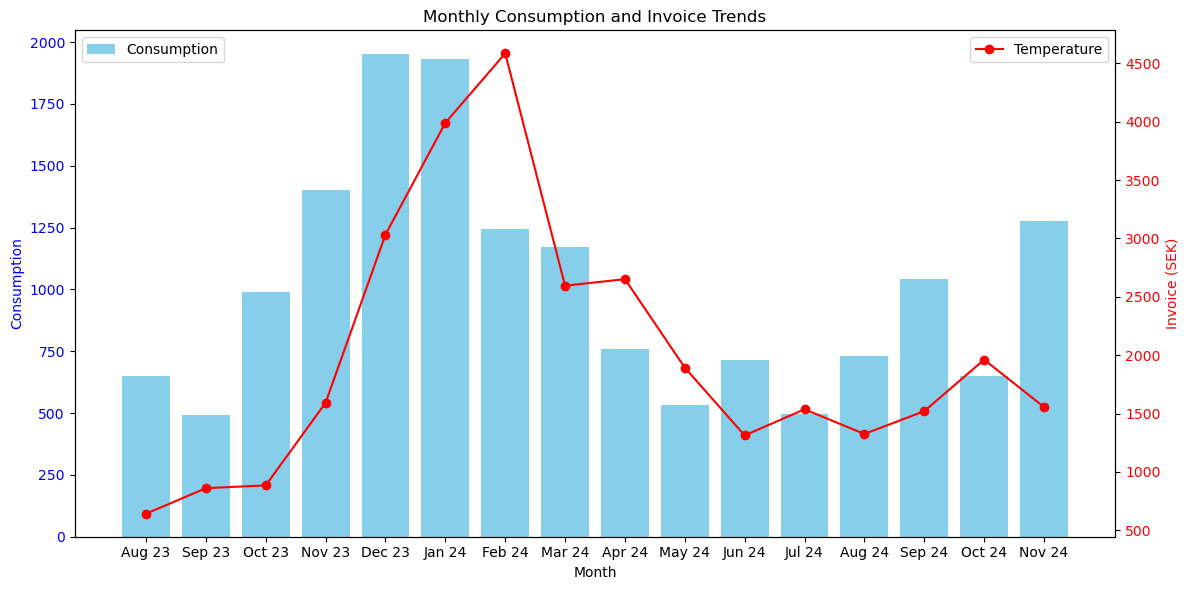

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(current_data_df["Month_Year"], current_data_df["Consumption"], color="skyblue", label="Consumption")
ax1.set_ylabel("Consumption", color="blue")
ax1.set_xlabel("Month")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(current_data_df["Month_Year"], current_data_df["Invoice"], color="red", marker="o", label="Temperature")
ax2.set_ylabel("Invoice (SEK)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Monthly Consumption and Invoice Trends")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Consumption, temperature and invoice
We observe that consumption increases as the temperature drops, which is expected during colder months when energy usage for heating typically rises. This pattern is further reflected in the invoice amounts, which also increase during months of higher consumption.

### Cost per Unit of Consumption

The Cost per Unit of Consumption provides a measure of how much is being paid per unit of energy consumed. This metric can help identify trends in energy pricing over time, including potential seasonal rate changes, discounts, or anomalies in billing.

#### Formula:

The cost per unit, denoted as  C , is calculated as:

$$
C = \frac{I}{C_m}
$$

Where:
- $I$  represents the total Invoice amount for the month.
- $C_m$  is the Consumption for the corresponding month.


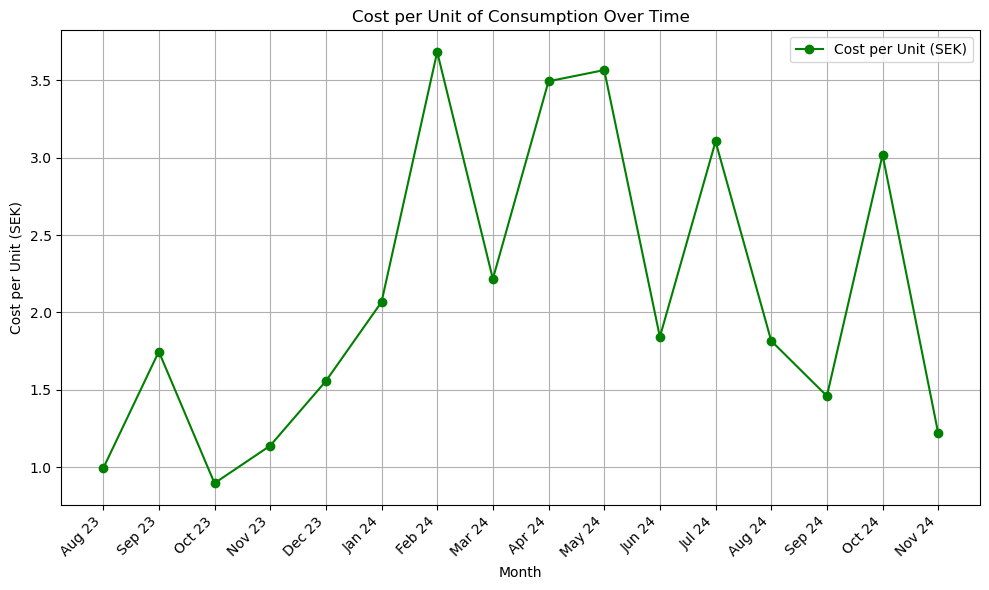

In [9]:
current_data_df["Cost_per_Unit"] = current_data_df["Invoice"] / current_data_df["Consumption"]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    current_data_df["Month_Year"],
    current_data_df["Cost_per_Unit"],
    marker="o",
    color="green",
    label="Cost per Unit (SEK)"
)
ax.set_title("Cost per Unit of Consumption Over Time")
ax.set_xlabel("Month")
ax.set_ylabel("Cost per Unit (SEK)")
ax.grid(True)
ax.legend()

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Cost per Unit Analysis: October and November

Analyzing the data for October 2023 vs. October 2024 and November 2023 vs. November 2024 reveals a concerning trend.
- In October 2024, despite a significant reduction in energy consumption compared to October 2023—thanks to the installation of a new energy-efficient heater—the invoice amount was higher. This indicates a substantial increase in energy prices, which outweighed the benefits of reduced consumption.
- Similarly, in November 2024, consumption was lower than in November 2023, yet the invoice amount remained almost the same. This further supports the observation that energy rates have increased.

Key Takeaways:
1.	Energy Price Increases:
    -	The cost per unit of energy has risen significantly from 2023 to 2024. Even with improved energy efficiency and reduced consumption, the invoices for both months (October and November) reflect higher or equivalent costs compared to the previous year.
2.	Negation of Savings:
    -	The financial benefits of the energy-efficient heater, which reduced consumption in October and November 2024, were negated by higher energy prices.
3.	Billing Practices:
    -	Fixed costs, seasonal pricing, or surcharges applied by the energy provider may have further contributed to the higher invoices.